In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


In [2]:
# y = mx+c
X = np.arange(0,30,0.2777)
y = 0.9912*X+0.7734
print(X[:5],y[:5])

[0.     0.2777 0.5554 0.8331 1.1108] [0.7734     1.04865624 1.32391248 1.59916872 1.87442496]


In [3]:
X_mean = np.mean(X)
Y_mean = np.mean(y)

In [4]:
print(X_mean,Y_mean)

14.995800000000001 15.63723696


In [5]:
n = len(X)
cov_x_y = (1/n)*sum((X-X.mean())*(y-y.mean()))
cov_x = (1/n)*sum(X-X.mean())**2
cov_y = (1/n)*sum(y-y.mean())**2

In [6]:
print(cov_x_y)
print(cov_x)   
print(cov_y)

75.67427126951999
9.738451688673335e-29
4.1686594624523195e-30


In [7]:
b1 = cov_x_y / cov_x 
b0 = Y_mean - b1 * X_mean
print(f'y={b0:.4f}+{b1:.4f}x')

y=-11652737759364092665305887670272.0000+777066762651148504494369669120.0000x


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,30,0.277)
y= 0.99123*x+0.7734
print(len(x),len(y))

109 109


In [9]:
split = int (len(x) * 0.8)
x_train,y_train = x[:split],y[:split]
x_test,y_test = x[split:],y[split:]

In [10]:
def plot_data(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test,predictions=None):
    plt.scatter(x_train, y_train,c='b',label='Training data')
    plt.scatter(x_test, y_test,c='r',label='Test data')
    if predictions is not None:
        plt.scatter(x_test, predictions, c='g', label='Predictions')
    plt.title('x vs y')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

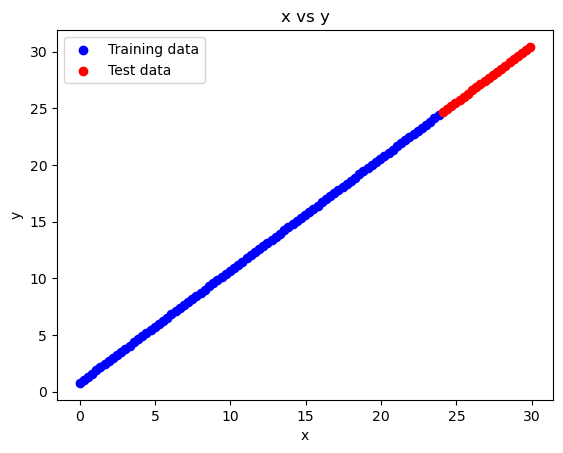

In [11]:
plot_data(x_train,y_train,x_test,y_test)

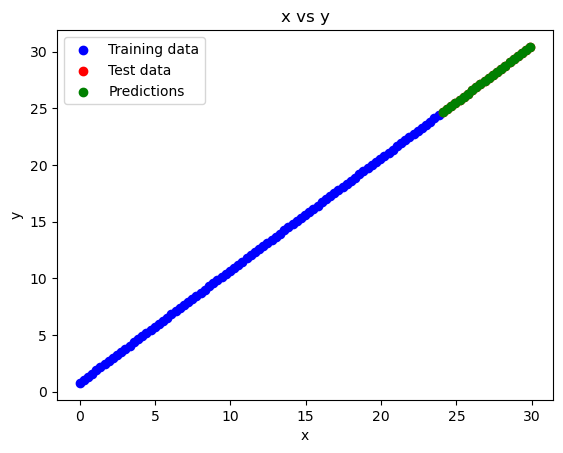

In [12]:
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(-1,1),y_train)

predictions = lr_model.predict(x_test.reshape(-1,1))

plot_data(predictions=predictions)

# STATS MODALS 

In [13]:
# stats model don't take constast so we need to provide conststan to the stats models 

X_train_sm = sm.add_constant(x_train)
X_test_sm = sm.add_constant(y_train)

model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.163e+05
Date:                Mon, 09 Feb 2026   Prob (F-statistic):                   1.95e-136
Time:                        13:03:45   Log-Likelihood:                         -41.536
No. Observations:                  87   AIC:                                      85.07
Df Residuals:                      86   BIC:                                      87.54
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y_preds =  model.predict(X_test_sm)
plot_data(y_preds)

ValueError: shapes (87,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [21]:
# multiple linear regression 
X1 = np.arange(0,30,0.227)
X2 = np.arange(0,30,0.227)
X = np.hstack((X1,X2))
y = 9.9912*X1 + 5.555*X2 + 4.7734
df= pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'y':y
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      133 non-null    float64
 1   X2      133 non-null    float64
 2   y       133 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [22]:
df.head()

,X1,X2,y
0,0.000,0.000,4.773400
1,0.227,0.227,8.302387
2,0.454,0.454,11.831375
3,0.681,0.681,15.360362
4,0.908,0.908,18.889350


In [23]:
X= df.drop(columns='y')
y = df['y']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.571e+06
Date:                Mon, 09 Feb 2026   Prob (F-statistic):                   5.05e-221
Time:                        13:10:22   Log-Likelihood:                         -239.19
No. Observations:                 106   AIC:                                      480.4
Df Residuals:                     105   BIC:                                      483.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
y_preds = model.predict(X_test_sm)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_preds))

ValueError: Found input variables with inconsistent numbers of samples: [27, 87]